# Assignment 1

## Exploratory Data Analysis


### Game recomendations in Steam 

Analyzing Steam game data is fascinating for me as a gamer who frequently uses Steam. It provides insights into trends, pricing, and user reviews, enriching my understanding of the gaming landscape. This analysis is a personal exploration, offering a unique perspective on the games I enjoy and the broader Steam community, potentially enhancing my gaming experiences. 
My goals are: 
1. Explore trends in pricing and how it correlates with game popularity
2. Investigate the relationship between pricing, reviews, and sales
3. Analyze how certain attributes contribute to a game's popularity

In [1]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

<p>The dataset consists of three main entities:</p>
<ul>
<li><a target="_blank" href="https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=games.csv">games.csv</a> - a table of games (or add-ons) information on ratings, pricing in US dollars $, release date, etc. A piece of extra non-tabular details on games, such as descriptions and tags, is in a <a target="_blank" href="https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=games_metadata.json">metadata file</a>;</li>
<li><a target="_blank" href="https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=users.csv">users.csv</a> - a table of user profiles' public information: the number of purchased products and reviews published;</li>
<li><a target="_blank" href="https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=recommendations.csv">recommendations.csv</a> - a table of user reviews: whether the user recommends a product. The table represents a many-many relation between a game entity and a user entity.</li>
</ul>

In [2]:
# Loading the data
games_data = pd.read_csv('./games.csv')
recommendations_data = pd.read_csv('./recommendations.csv')
users_data = pd.read_csv('./users.csv')

In [3]:
# Looking at our data
games_data.head(5)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [4]:
recommendations_data.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,49625,0
1,304390,4,0,2017-02-17,False,11.5,2482,1
2,1085660,2,0,2019-11-17,True,336.5,243409,2
3,703080,0,0,2022-09-23,True,27.4,248701,3
4,526870,0,0,2021-01-10,True,7.9,22902,4


In [5]:
users_data.head(5)

,user_id,products,reviews
0,7090995,359,0
1,13511788,156,1
2,8444727,329,4
3,4632233,176,3
4,4968781,98,2


In [6]:
# Combining the data into one dataframe 
data = pd.merge(games_data, recommendations_data) 
games = pd.merge(data, users_data)

In [7]:
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,...,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id,products,reviews
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,...,True,2,0,2015-05-30,True,0.4,3236702,14254690,271,80
1,548570,RAGE 2,2019-05-13,True,False,False,Mixed,62,12779,39.99,...,True,3,0,2019-09-24,True,0.2,3236702,35063870,271,80
2,247910,Sniper Elite: Nazi Zombie Army 2,2013-10-31,True,False,False,Very Positive,84,2858,14.99,...,True,0,0,2014-03-01,True,3.1,3236702,33238060,271,80
3,354380,Assassin’s Creed® Chronicles: China,2015-04-21,True,False,False,Mostly Positive,73,2954,9.99,...,True,190,46,2015-04-21,True,15.5,3236702,29395335,271,80
4,256290,Child of Light,2014-04-29,True,False,False,Very Positive,92,11242,14.99,...,True,0,0,2014-05-01,True,15.7,3236702,32393619,271,80


In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38354101 entries, 0 to 38354100
Data columns (total 22 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   title           object 
 2   date_release    object 
 3   win             bool   
 4   mac             bool   
 5   linux           bool   
 6   rating          object 
 7   positive_ratio  int64  
 8   user_reviews    int64  
 9   price_final     float64
 10  price_original  float64
 11  discount        float64
 12  steam_deck      bool   
 13  helpful         int64  
 14  funny           int64  
 15  date            object 
 16  is_recommended  bool   
 17  hours           float64
 18  user_id         int64  
 19  review_id       int64  
 20  products        int64  
 21  reviews         int64  
dtypes: bool(5), float64(4), int64(9), object(4)
memory usage: 5.3+ GB


In [9]:
# Dropping the columns that are not needed for further analysis
columns_to_drop = ['app_id', 'price_original', 'discount', 'user_id', 'review_id', 'funny']
games = games.drop(columns_to_drop, axis=1)

In [10]:
games.head()

,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,steam_deck,helpful,date,is_recommended,hours,products,reviews
0,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,True,2,2015-05-30,True,0.4,271,80
1,RAGE 2,2019-05-13,True,False,False,Mixed,62,12779,39.99,True,3,2019-09-24,True,0.2,271,80
2,Sniper Elite: Nazi Zombie Army 2,2013-10-31,True,False,False,Very Positive,84,2858,14.99,True,0,2014-03-01,True,3.1,271,80
3,Assassin’s Creed® Chronicles: China,2015-04-21,True,False,False,Mostly Positive,73,2954,9.99,True,190,2015-04-21,True,15.5,271,80
4,Child of Light,2014-04-29,True,False,False,Very Positive,92,11242,14.99,True,0,2014-05-01,True,15.7,271,80


In [11]:
games.describe()

,positive_ratio,user_reviews,price_final,helpful,hours,products,reviews
count,3.835410e+07,3.835410e+07,3.835410e+07,3.835410e+07,3.835410e+07,3.835410e+07,3.835410e+07
mean,8.646492e+01,1.885389e+05,1.915949e+01,3.291471e+00,1.044808e+02,2.780149e+02,2.202614e+01
std,1.089774e+01,6.201600e+05,1.670521e+01,4.825269e+01,1.793169e+02,6.559522e+02,1.184371e+02
min,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.200000e+01,1.162100e+04,4.990000e+00,0.000000e+00,8.500000e+00,4.900000e+01,2.000000e+00
50%,8.900000e+01,5.089000e+04,1.699000e+01,0.000000e+00,2.940000e+01,1.180000e+02,5.000000e+00
75%,9.400000e+01,1.465590e+05,2.999000e+01,0.000000e+00,1.051000e+02,2.700000e+02,1.400000e+01
max,1.000000e+02,7.494460e+06,2.699900e+02,3.621200e+04,1.000000e+03,3.221400e+04,5.306000e+03


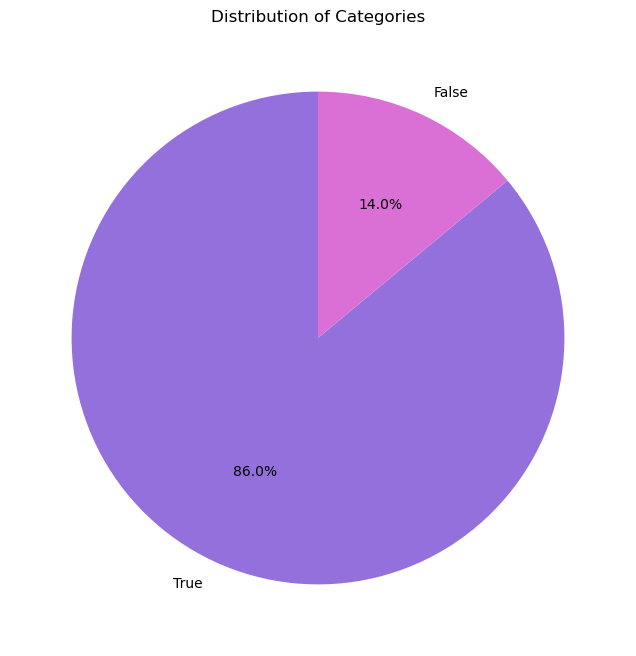

In [59]:
# Counting occurrences of each category
category_counts = games['is_recommended'].value_counts()
colors = ['mediumpurple', 'orchid']
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Distribution of Categories')
plt.show()

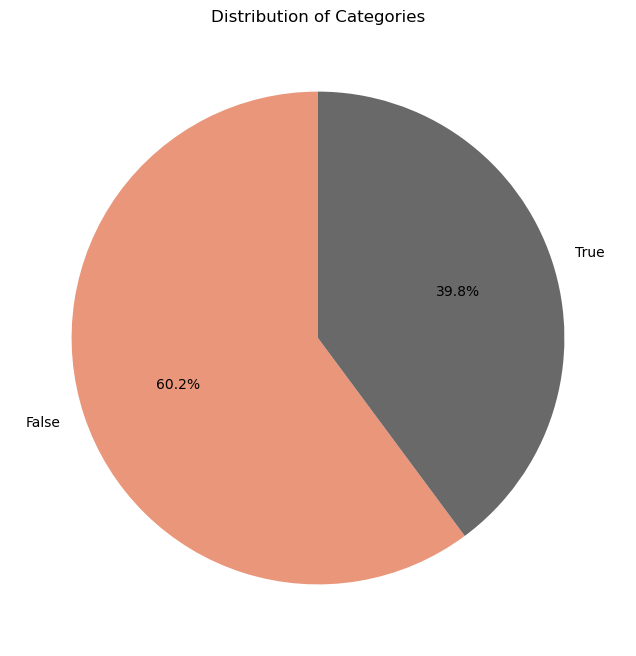

In [50]:
# Counting occurrences of each category
category_counts_1 = games['mac'].value_counts()
colors = ['darksalmon', 'dimgrey']
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts_1, labels=category_counts_1.index, autopct='%1.1f%%', startangle=90,colors = colors)
plt.title('Distribution of Categories')
plt.show()

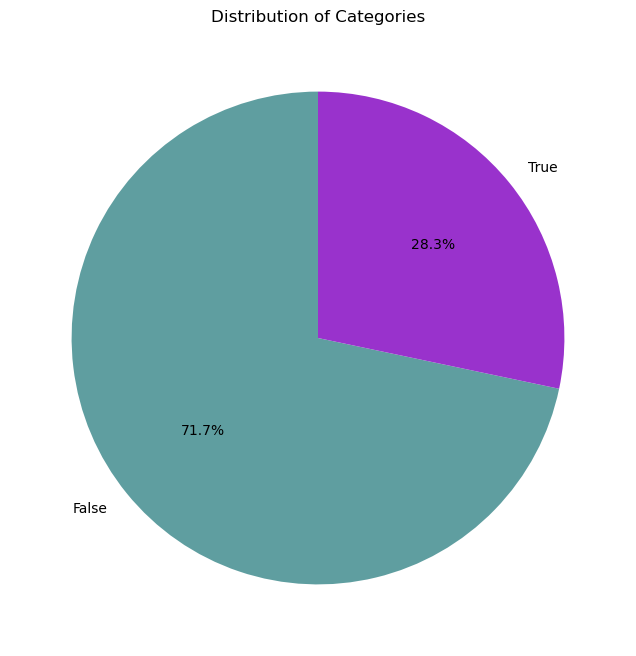

In [49]:
# Counting occurrences of each category
category_counts_2 = games['linux'].value_counts()
colors = ['cadetblue', 'darkorchid']
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts_2, labels=category_counts_2.index, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Distribution of Categories')
plt.show()

In [24]:
# Counting percentage of ratings
percentage_distribution = games['rating'].value_counts(normalize=True) * 100

# Printing the result
print(percentage_distribution.map('{:.4f}%'.format))

Very Positive              57.0596%
Overwhelmingly Positive    24.5276%
Mostly Positive            10.8930%
Mixed                       6.7854%
Mostly Negative             0.3578%
Positive                    0.3167%
Overwhelmingly Negative     0.0413%
Negative                    0.0117%
Very Negative               0.0069%
Name: rating, dtype: object


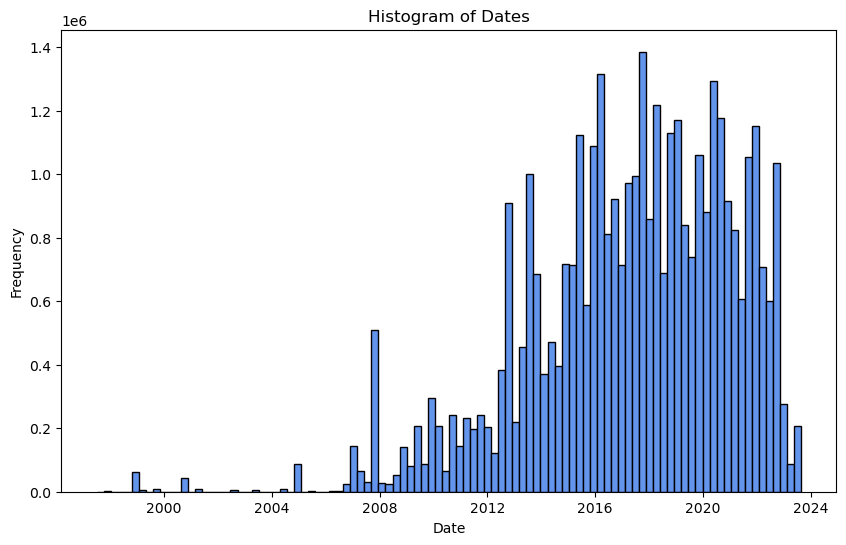

In [43]:
# Converting the 'date_release' to a datetime format
games['date_release'] = pd.to_datetime(games['date_release'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(games['date_release'], bins=100, edgecolor='black', color = 'cornflowerblue')
plt.title('Histogram of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()